In this project, we have created a binary classifier to predict the probability that a patient with diabetes would be readmitted to the hospital within 30 days. On our test data, the best performing model had an AUC of of 0.67. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# load the csv file
df = pd.read_csv('C:/Users/admin/Documents/diabetes/diabetic_data.csv')

In [4]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


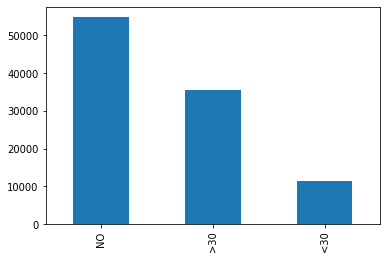

In [7]:
#readmitted is the target variable. 
df['readmitted'].value_counts().plot(kind='bar')  

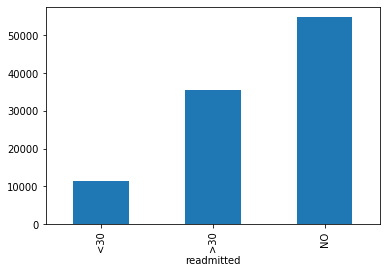

In [8]:
df.groupby('readmitted').size().plot(kind='bar')   #this is same as above  

In [8]:
df['discharge_disposition_id'].value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [74]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]
#as id's 11,13,14,19,20,21 are related to death we will remove them.

In [9]:
df['output_var']=(df.readmitted == '<30').astype('int')          #output_var is now the target variable

In [76]:
df.loc[:,['output_var','readmitted']]    #means i want all rows and these 2 colms

,output_var,readmitted
0,0,NO
1,0,>30
2,0,NO
3,0,NO
4,0,NO
...,...,...
101761,0,>30
101762,0,NO
101763,0,NO
101764,0,NO


In [12]:
#output_var is  an output variable for our binary classification. 
#Here we will try to predict if a patient is likely to be re-admitted within 30 days of discharge.
#thus we can see that the bias is towards 0
df['output_var'].value_counts()  

0    88029
1    11314
Name: output_var, dtype: int64

In [15]:
df[list(df.columns)[10:20]].head()

,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2
0,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?
1,?,?,59,0,18,0,0,0,276,250.01
2,?,?,11,5,13,2,0,1,648,250
3,?,?,44,1,16,0,0,0,8,250.43
4,?,?,51,0,8,0,0,0,197,157


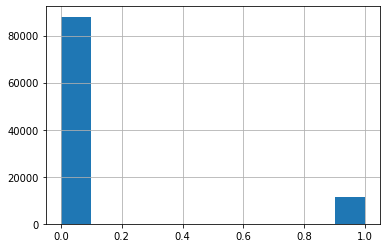

In [29]:
df['output_var'].hist() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3A3CA7B08>,
      dtype=object)

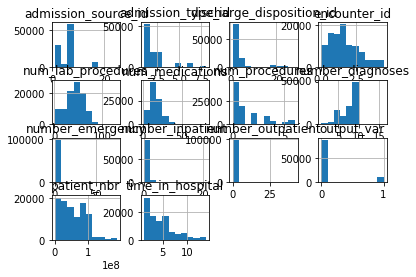

In [30]:
df.hist()

In [10]:
# missing values in data is ?
df = df.replace('?',np.nan)

In [11]:
num=df.select_dtypes('number').columns      #numerical columns
num

Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'output_var'],
      dtype='object')

In [12]:
#drop  the id columns as they are of no use.
df=df.drop(['encounter_id', 'patient_nbr','admission_type_id','discharge_disposition_id','admission_source_id'], axis = 1)

In [13]:
df


,race,gender,age,weight,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,output_var
0,Caucasian,Female,[0-10),NaN,1,NaN,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,[10-20),NaN,3,NaN,NaN,59,0,18,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,AfricanAmerican,Female,[20-30),NaN,2,NaN,NaN,11,5,13,...,No,No,No,No,No,No,No,Yes,NO,0
3,Caucasian,Male,[30-40),NaN,2,NaN,NaN,44,1,16,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,[40-50),NaN,1,NaN,NaN,51,0,8,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,3,MC,NaN,51,0,16,...,Down,No,No,No,No,No,Ch,Yes,>30,0
101762,AfricanAmerican,Female,[80-90),NaN,5,MC,NaN,33,3,18,...,Steady,No,No,No,No,No,No,Yes,NO,0
101763,Caucasian,Male,[70-80),NaN,1,MC,NaN,53,0,9,...,Down,No,No,No,No,No,Ch,Yes,NO,0
101764,Caucasian,Female,[80-90),NaN,10,MC,Surgery-General,45,2,21,...,Up,No,No,No,No,No,Ch,Yes,NO,0


In [14]:
#numerical columns
num=df.select_dtypes('number').columns
num

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'output_var'],
      dtype='object')

In [15]:
df[num].isnull().sum()

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
output_var            0
dtype: int64

In [16]:
df=df.drop(['citoglipton','examide','diag_1','diag_2','diag_3','readmitted'],axis=1)

In [17]:
#categorical 
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist() 
one_hot_encode_cols 

['race',
 'gender',
 'age',
 'weight',
 'payer_code',
 'medical_specialty',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [18]:
df[one_hot_encode_cols].isnull().sum() #missing values in categorical

race                         2273
gender                          0
age                             0
weight                      98569
payer_code                  40256
medical_specialty           49949
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change        

In [19]:
df['race'] = df['race'].fillna('UNK')
df['payer_code'] = df['payer_code'].fillna('UNK')
df['medical_specialty'] = df['medical_specialty'].fillna('UNK')

In [21]:
t10 = ['UNK','InternalMedicine','Emergency/Trauma',\
          'Family/GeneralPractice', 'Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']


df['med'] = df['medical_specialty'].copy()


df.loc[~df.med.isin(t10),'med'] = 'Other'

In [22]:
df.groupby('med').size()

med
Cardiology                     5352
Emergency/Trauma               7565
Family/GeneralPractice         7440
InternalMedicine              14635
Nephrology                     1613
Orthopedics                    1400
Orthopedics-Reconstructive     1233
Other                          8340
Radiologist                    1140
Surgery-General                3099
UNK                           49949
dtype: int64

In [18]:
df.head()

,race,gender,age,weight,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,output_var,med_spec
0,Caucasian,Female,[0-10),NaN,1,UNK,Pediatrics-Endocrinology,41,0,1,...,No,No,No,No,No,No,No,NO,0,Other
1,Caucasian,Female,[10-20),NaN,3,UNK,UNK,59,0,18,...,No,No,No,No,No,Ch,Yes,>30,0,UNK
2,AfricanAmerican,Female,[20-30),NaN,2,UNK,UNK,11,5,13,...,No,No,No,No,No,No,Yes,NO,0,UNK
3,Caucasian,Male,[30-40),NaN,2,UNK,UNK,44,1,16,...,No,No,No,No,No,Ch,Yes,NO,0,UNK
4,Caucasian,Male,[40-50),NaN,1,UNK,UNK,51,0,8,...,No,No,No,No,No,Ch,Yes,NO,0,UNK


In [ ]:
#Modification of age and weight columns

In [19]:
df[['age', 'weight']].head()

,age,weight
0,[0-10),NaN
1,[10-20),NaN
2,[20-30),NaN
3,[30-40),NaN
4,[40-50),NaN


In [23]:
ages = {'[0-10)':0, 
          '[10-20)':10, 
          '[20-30)':20, 
          '[30-40)':30, 
          '[40-50)':40, 
          '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90}
df['age_now'] = df.age.replace(ages)

In [24]:
df.groupby('weight').size()

weight
>200            3
[0-25)         48
[100-125)     625
[125-150)     145
[150-175)      35
[175-200)      11
[25-50)        97
[50-75)       897
[75-100)     1336
dtype: int64

In [90]:
df.weight.notnull().astype('int')

0         0
1         0
2         0
3         0
4         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: weight, Length: 99343, dtype: int32

In [25]:
df['weight_is'] = df.weight.notnull().astype('int')

In [26]:
df['age_now']

0          0
1         10
2         20
3         30
4         40
          ..
101761    70
101762    80
101763    70
101764    80
101765    70
Name: age_now, Length: 101766, dtype: int64

In [27]:
df=df.drop(['age','weight'],axis=1)

In [28]:
num=df.select_dtypes('number').columns    #numerical columns
num

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'output_var', 'age_now',
       'weight_is'],
      dtype='object')

In [29]:
df.drop(['medical_specialty'],axis=1)

,race,gender,time_in_hospital,payer_code,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,output_var,med,age_now,weight_is
0,Caucasian,Female,1,UNK,41,0,1,0,0,0,...,No,No,No,No,No,No,0,Other,0,0
1,Caucasian,Female,3,UNK,59,0,18,0,0,0,...,No,No,No,No,Ch,Yes,0,UNK,10,0
2,AfricanAmerican,Female,2,UNK,11,5,13,2,0,1,...,No,No,No,No,No,Yes,0,UNK,20,0
3,Caucasian,Male,2,UNK,44,1,16,0,0,0,...,No,No,No,No,Ch,Yes,0,UNK,30,0
4,Caucasian,Male,1,UNK,51,0,8,0,0,0,...,No,No,No,No,Ch,Yes,0,UNK,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,3,MC,51,0,16,0,0,0,...,No,No,No,No,Ch,Yes,0,UNK,70,0
101762,AfricanAmerican,Female,5,MC,33,3,18,0,0,1,...,No,No,No,No,No,Yes,0,UNK,80,0
101763,Caucasian,Male,1,MC,53,0,9,1,0,0,...,No,No,No,No,Ch,Yes,0,UNK,70,0
101764,Caucasian,Female,10,MC,45,2,21,0,0,1,...,No,No,No,No,Ch,Yes,0,Surgery-General,80,0


In [31]:
columns_catego = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','payer_code']  #categorical

In [32]:
#one hot encoding for categorical
one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields



# Do the one hot encoding
df_catego = pd.get_dummies(df[columns_catego + ['med']],drop_first=True)

In [33]:
df_catego.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,...,med_Emergency/Trauma,med_Family/GeneralPractice,med_InternalMedicine,med_Nephrology,med_Orthopedics,med_Orthopedics-Reconstructive,med_Other,med_Radiologist,med_Surgery-General,med_UNK
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
df = pd.concat([df,df_catego], axis = 1)

In [35]:
df.head(4)

,race,gender,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,med_Emergency/Trauma,med_Family/GeneralPractice,med_InternalMedicine,med_Nephrology,med_Orthopedics,med_Orthopedics-Reconstructive,med_Other,med_Radiologist,med_Surgery-General,med_UNK
0,Caucasian,Female,1,UNK,Pediatrics-Endocrinology,41,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Caucasian,Female,3,UNK,UNK,59,0,18,0,0,...,0,0,0,0,0,0,0,0,0,1
2,AfricanAmerican,Female,2,UNK,UNK,11,5,13,2,0,...,0,0,0,0,0,0,0,0,0,1
3,Caucasian,Male,2,UNK,UNK,44,1,16,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
cols_all_catego = list(df_catego.columns)#these are categorical columns
cols_all_catego

['race_Asian',
 'race_Caucasian',
 'race_Hispanic',
 'race_Other',
 'race_UNK',
 'gender_Male',
 'gender_Unknown/Invalid',
 'max_glu_serum_>300',
 'max_glu_serum_None',
 'max_glu_serum_Norm',
 'A1Cresult_>8',
 'A1Cresult_None',
 'A1Cresult_Norm',
 'metformin_No',
 'metformin_Steady',
 'metformin_Up',
 'repaglinide_No',
 'repaglinide_Steady',
 'repaglinide_Up',
 'nateglinide_No',
 'nateglinide_Steady',
 'nateglinide_Up',
 'chlorpropamide_No',
 'chlorpropamide_Steady',
 'chlorpropamide_Up',
 'glimepiride_No',
 'glimepiride_Steady',
 'glimepiride_Up',
 'acetohexamide_Steady',
 'glipizide_No',
 'glipizide_Steady',
 'glipizide_Up',
 'glyburide_No',
 'glyburide_Steady',
 'glyburide_Up',
 'tolbutamide_Steady',
 'pioglitazone_No',
 'pioglitazone_Steady',
 'pioglitazone_Up',
 'rosiglitazone_No',
 'rosiglitazone_Steady',
 'rosiglitazone_Up',
 'acarbose_No',
 'acarbose_Steady',
 'acarbose_Up',
 'miglitol_No',
 'miglitol_Steady',
 'miglitol_Up',
 'troglitazone_Steady',
 'tolazamide_Steady',
 'tola

In [37]:
df['med']

0                   Other
1                     UNK
2                     UNK
3                     UNK
4                     UNK
               ...       
101761                UNK
101762                UNK
101763                UNK
101764    Surgery-General
101765                UNK
Name: med, Length: 101766, dtype: object

In [38]:
#numerical columns

num=['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses',  'age_now',
       'weight_is']

In [39]:
print('Total number of features:', len(num + cols_all_catego))

Total number of features: 100


In [40]:
df[num + cols_all_catego ].isnull().sum().sort_values(ascending = False).head(10)

med_UNK                  0
glimepiride_Steady       0
repaglinide_No           0
repaglinide_Steady       0
repaglinide_Up           0
nateglinide_No           0
nateglinide_Steady       0
nateglinide_Up           0
chlorpropamide_No        0
chlorpropamide_Steady    0
dtype: int64

In [41]:
u = num + cols_all_catego
df_i=df[u+['output_var']]

In [42]:
y_col='output_var'
X=df_i.drop(y_col, axis=1)
y=df_i['output_var']

In [43]:
#other method
df_i = df_i.sample(n = len(df_i), random_state = 42)
df_i = df_i.reset_index(drop = True)

In [44]:
df_validation_testing=df_i.sample(frac=0.30,random_state=42)

In [45]:
df_testing = df_validation_testing.sample(frac = 0.5, random_state = 42)
df_validation = df_validation_testing.drop(df_testing.index)

In [46]:
len(df_testing)/len(df_validation_testing)

0.5

In [47]:
len(df_validation)/len(df_validation_testing)

0.5

In [48]:
df_train=df_i.drop(df_validation_testing.index)

In [49]:
# splitting of data into positive and negative training data
ros_positive = df_train.output_var == 1
df_train_positive = df_train.loc[ros_positive]
df_train_negative = df_train.loc[~ros_positive]


df_train_final = pd.concat([df_train_positive, df_train_negative.sample(n = len(df_train_positive), random_state = 42)],axis = 0)


df_train_final = df_train_final.sample(n = len(df_train_final), random_state = 42).reset_index(drop = True)

In [50]:
y_col='output_var'
X_train = df_train_final.drop(y_col,axis=1)
X_train_all_are = df_train.drop(y_col,axis=1)
X_valid = df_validation.drop(y_col,axis=1)

y_train = df_train_final['output_var'].values
y_valid = df_validation['output_var'].values

print('Training  shapes is:',X_train_all_are.shape)
print('Training shape is:',X_train.shape, y_train.shape)
print('Validation shape is:',X_valid.shape, y_valid.shape)

Training  shapes is: (71236, 100)
Training shape is: (16014, 100) (16014,)
Validation shape is: (15265, 100) (15265,)


In [51]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all_are)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
X_training_s = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

In [59]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score


def res(y_true, y_pred):
    
    auc = roc_auc_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred )
    precision = precision_score(y_true, y_pred)
   
    print('AUC',auc)
    print('ACCURACY',accuracy)
    print('RECALL',recall)
    print('PRECISION',precision)
    
    return auc, accuracy, recall, precision

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_training_s, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [60]:
y_train_predictions = rf.predict(X_training_s)
y_valid_predictions = rf.predict(X_valid_tf)

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision =res(y_train,y_train_predictions)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision = res(y_valid,y_valid_predictions)

Random Forest
Training:
AUC 0.6238915948545024
ACCURACY 0.6238915948545023
RECALL 0.5909828899712751
PRECISION 0.6326203208556149
Validation:
AUC 0.5989433742822596
ACCURACY 0.6232558139534884
RECALL 0.5677114133648729
PRECISION 0.1605351170568562


In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gb.fit(X_training_s, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
y_training_predsee = gb.predict(X_training_s)
y_validation_predsee = gb.predict(X_valid_tf)

print('Gradient Boosting Classifier')
print('Training:')
g_train_auc, g_train_accuracy, g_train_recall, g_train_precision = res(y_train,y_training_predsee)
print('Validation:')
g_valid_auc, g_valid_accuracy, g_valid_recall, g_valid_precision= res(y_valid,y_validation_predsee)

Gradient Boosting Classifier
Training:
AUC 0.6785937304858249
ACCURACY 0.6785937304858249
RECALL 0.6729112026976396
PRECISION 0.6806467913087418
Validation:
AUC 0.5815742291612735
ACCURACY 0.5845397969210613
RECALL 0.5777646363098758
PRECISION 0.14791824375473125


In [63]:
#introduce grid_search and improve performance
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [64]:
from sklearn.model_selection import RandomizedSearchCV

#  trees number
estimators_num = range(200,1000,200)

fea = ['auto','sqrt']
split = range(2,10,2)

criterion = ['gini','entropy']

depth = range(1,10,1)



# random grid

random_grid = {'n_estimators':estimators_num,
              'max_features':fea,
              'max_depth':depth,
              'min_samples_split':split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [65]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [66]:
# create the randomized search cross-validation
rf_second = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

In [67]:
rf_second.fit(X_training_s, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.7min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=6,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                  

In [68]:
rf_second.best_params_

{'n_estimators': 600,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 6,
 'criterion': 'entropy'}

In [71]:
print('Optimized Random Forest--results are')
y_train_predictions_second = rf_second.best_estimator_.predict(X_training_s)
y_valid_predictions_second = rf_second.best_estimator_.predict(X_valid_tf)

rf_training_auc_score = roc_auc_score(y_train, y_train_predictions_second)
rf_validation_auc_score = roc_auc_score(y_valid, y_valid_predictions_second)

print('training auc score',rf_training_auc_score)
print('validation auc score',rf_validation_auc_score)

Optimized Random Forest--results are
training auc score 0.617959285625078
validation auc score 0.6012389367191269
